<a href="https://colab.research.google.com/github/0xFAB10/Data-Analysis-Exercises/blob/main/Regression_Study_Boston_Police.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

In [2]:
rawBostonData = pd.read_csv\
        ('https://raw.githubusercontent.com'\
            '/PacktWorkshops/The-Data-Science-Workshop'\
            '/master/Chapter02/Dataset/Boston.csv')

In [3]:
rawBostonData = rawBostonData.dropna()
rawBostonData = rawBostonData.drop_duplicates()

In [4]:
renamedBostonData = rawBostonData.rename(
     columns = {
        'CRIM':'crimeRatePerCapita',
        ' ZN ':'landOver25K_sqft',
        'INDUS ':'non-retailLandProptn',
        'CHAS':'riverDummy',
        'NOX':'nitrixOxide_pp10m',
        'RM':'AvgNo.RoomsPerDwelling',
        'AGE':'ProptnOwnerOccupied',
        'DIS':'weightedDist',
        'RAD':'radialHighwaysAccess',
        'TAX':'propTaxRate_per10K',
        'PTRATIO':'pupilTeacherRatio',
        'LSTAT':'pctLowerStatus',
        'MEDV':'medianValue_Ks'
    }
)

In [5]:
X = renamedBostonData.drop('crimeRatePerCapita', axis=1)
y = renamedBostonData[['crimeRatePerCapita']]
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 10
)
train_data = pd.concat([X_train, y_train], axis = 1)
test_data = pd.concat([X_test, y_test], axis = 1)

In [6]:
logLinearModel = smf.ols(
    formula = 'np.log(crimeRatePerCapita) ~ medianValue_Ks',
    data = train_data
)
logLinearModResult = logLinearModel.fit()

In [7]:
print(logLinearModResult.summary())

                                OLS Regression Results                                
Dep. Variable:     np.log(crimeRatePerCapita)   R-squared:                       0.238
Model:                                    OLS   Adj. R-squared:                  0.236
Method:                         Least Squares   F-statistic:                     109.9
Date:                        Fri, 27 Jan 2023   Prob (F-statistic):           1.48e-22
Time:                                20:05:02   Log-Likelihood:                -727.67
No. Observations:                         354   AIC:                             1459.
Df Residuals:                             352   BIC:                             1467.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

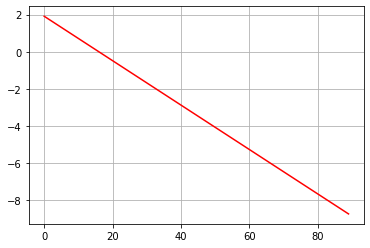

In [8]:
import matplotlib.pyplot as plt
# Linear equation of coefficients
# y = intercept + ( medianValue_Ks * x )
x = np.linspace(0.00632, 88.97620, 500)
y = 1.9107 - 0.1198*x
plt.plot(x,y, '-r')
plt.grid()
plt.show()